In [1]:
# import
import os
import numpy as np
import scipy as sp
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from nctpy.utils import matrix_normalization
from nctpy.metrics import ave_control, modal_control
from nctpy.plotting import set_plotting_params, reg_plot
set_plotting_params()

In [2]:
# load data
projdir = '/Users/lindenmp/Google-Drive-Penn/work/research_projects/nctpy'
A = np.load(os.path.join(projdir, 'data', 'schaefer_200_streamlineCount_A.npy'))
gradient = np.loadtxt((os.path.join(projdir, 'data', 'schaefer_200_pnc_grads_template.txt')))[:, 0]

In [3]:
print(A.shape)
print(gradient.shape)

(200, 200, 1068)
(200,)


In [4]:
n_nodes = A.shape[0]
n_subs = A.shape[2]

## Compute strength and controllability statistics

In [5]:
# strength function
def node_strength(A):
    str = np.sum(A, axis=0)

    return str

In [6]:
# containers
s = np.zeros((n_subs, n_nodes))
ac = np.zeros((n_subs, n_nodes))
mc = np.zeros((n_subs, n_nodes))

# define time system
system = 'discrete'

for i in tqdm(np.arange(n_subs)):
    a = A[:, :, i]  # get subject i's A matrix
    s[i, :] = node_strength(a)  # get strength

    a_norm = matrix_normalization(a, system=system)  # normalize subject's A matrix
    ac[i, :] = ave_control(a_norm, system=system)  # get average controllability
    mc[i, :] = modal_control(a_norm)  # get modal controllability

100%|██████████| 1068/1068 [00:42<00:00, 25.16it/s]


In [7]:
# compute cross subject correlations
corr_s_ac = np.zeros(n_nodes)
corr_s_mc = np.zeros(n_nodes)

for i in tqdm(np.arange(n_nodes)):
    corr_s_ac[i] = sp.stats.spearmanr(s[:, i], ac[:, i])[0]
    corr_s_mc[i] = sp.stats.spearmanr(s[:, i], mc[:, i])[0]

100%|██████████| 200/200 [00:00<00:00, 636.90it/s]


## Plot corr(s,ac) and corr(s,mc) over the principal cortical gradient of FC

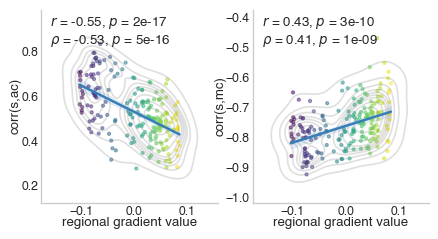

In [8]:
f, ax = plt.subplots(1, 2, figsize=(5, 2.5))
reg_plot(x=gradient, y=corr_s_ac,
         xlabel='regional gradient value', ylabel='corr(s,ac)',
         add_spearman=True, ax=ax[0], c=gradient)
reg_plot(x=gradient, y=corr_s_mc,
         xlabel='regional gradient value', ylabel='corr(s,mc)',
         add_spearman=True, ax=ax[1], c=gradient)
plt.show()
f.savefig(os.path.join(projdir, 'docs', 'source', 'pages', 'examples', 'gradient_metric_correlations'), dpi=300,
bbox_inches='tight', pad_inches=0.1)